# Binary Classification
Example Notebook.

In [1]:
!pip install https://github.com/yohann84L/plot_metric/archive/develop.zip
!pip install scikit-learn

  Using cached https://github.com/yohann84L/plot_metric/archive/develop.zip
  Created wheel for plot-metric: filename=plot_metric-0.0.6-cp36-none-any.whl size=15516 sha256=42e06bf46ed9237ad139fe8813e2b2bb3f71d558e1b98544562e2e2129886db4
  Stored in directory: /tmp/pip-ephem-wheel-cache-dcuurzdi/wheels/15/68/3b/82418f2894f7a12ef38176fff679a34802b6668af2b4f5b59b
Successfully built plot-metric


__*Package*__

In [0]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from pandas import DataFrame
from plot_metric import BinaryClassification
import matplotlib.pyplot as plt
import numpy as np

__*Make some prediction results*__

In [0]:
# Generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# Building Classifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)

# Train our classifier
model = clf.fit(X_train, y_train)

# Predict test set
y_pred = clf.predict_proba(X_test)[:,1]

We predicted probability of class. 

5 first value of y_pred :

In [4]:
y_pred[:5]

array([0.62, 0.76, 0.9 , 0.84, 0.5 ])

__*Build BinaryClassification object with prediction and groud truth y*__

In [0]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

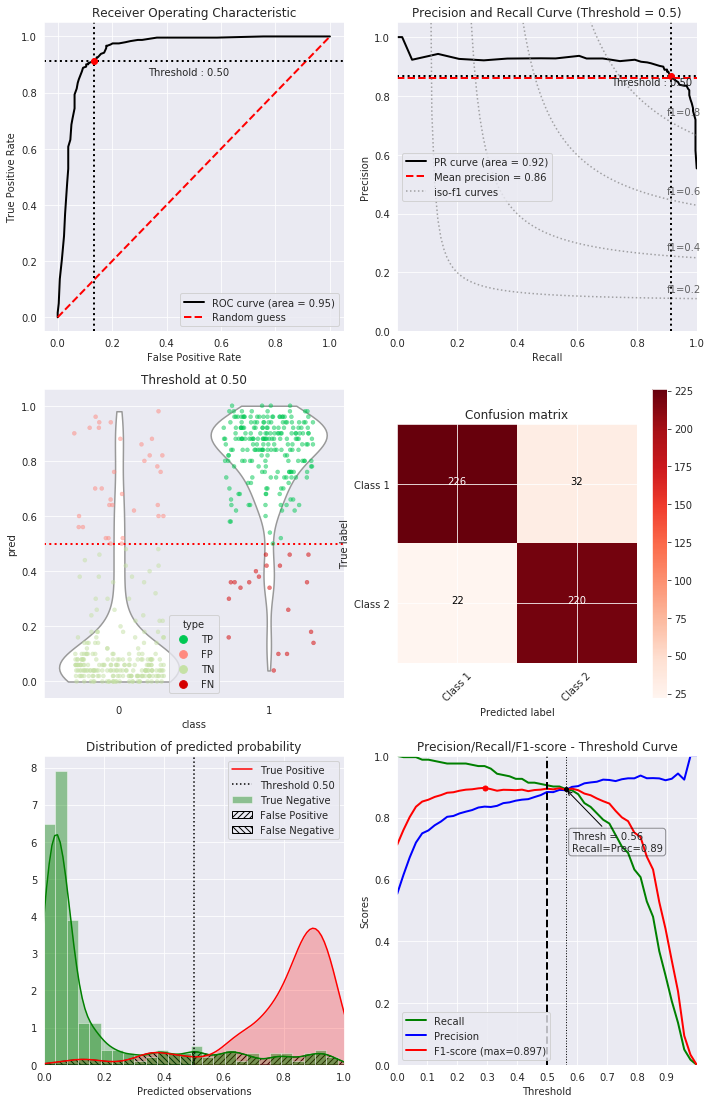

In [10]:
# Figures
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
bc.plot_roc_curve()

plt.subplot(3,2,2)
bc.plot_precision_recall_curve()

plt.subplot(3,2,3)
bc.plot_class_distribution()

plt.subplot(3,2,4)
bc.plot_confusion_matrix()

plt.subplot(3,2,5)
bc.plot_score_distribution()

plt.subplot(3,2,6)
bc.plot_threshold()

plt.show()

__*Display all param available for a function*__

In [0]:
from plot_metric import get_function_parameters

In [13]:
get_function_parameters(bc.plot_roc_curve, as_df=True)

,0
threshold,None
plot_threshold,True
linewidth,2
y_text_margin,0.05
x_text_margin,0.2
c_roc_curve,black
c_random_guess,red
c_thresh_lines,black
ls_roc_curve,-
ls_thresh_lines,:


__*Example custom param using dictionnary*__

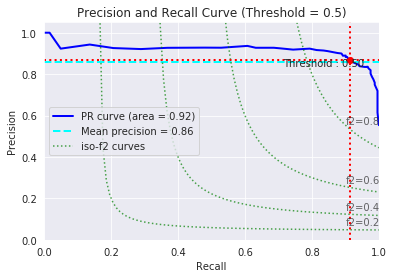

In [15]:
param_pr_plot = {
    'c_pr_curve':'blue',
    'c_mean_prec':'cyan',
    'c_thresh_lines':'red',
    'c_f1_iso':'green',
    'beta': 2,
}

_ = bc.plot_precision_recall_curve(**param_pr_plot)